# DS-210: Programming for Data Science


# Lecture 11: Overfitting and underfitting. Bias and variance.


In [1]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

from decision_area import draw_decision_area

## Noisy classification

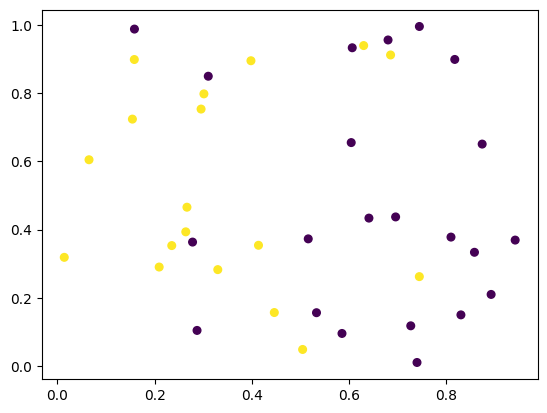

In [2]:
DIMENSIONS = 2

def noise(x, flip_prob=.25):
    if np.random.uniform() < flip_prob:
        return not x
    return x

f1 = lambda x : x[0] <= 0.5
f2 = lambda x : noise(x[0] <= 0.5)
 
SAMPLES = 40
X = np.random.uniform(size=(SAMPLES,DIMENSIONS))
Y = [f2(x) for x in X]
plt.scatter(X[:,0],X[:,1],30,c = Y)

TEST_SAMPLES = 1000
X2 = np.random.uniform(size=(TEST_SAMPLES,DIMENSIONS))
Y2 = [f2(x) for x in X2]

In [3]:
clf = DecisionTreeClassifier(max_leaf_nodes=25)
clf.fit(X,Y)
print(tree.export_text(clf))

|--- feature_0 <= 0.51
|   |--- feature_1 <= 0.94
|   |   |--- feature_0 <= 0.27
|   |   |   |--- class: True
|   |   |--- feature_0 >  0.27
|   |   |   |--- feature_0 <= 0.29
|   |   |   |   |--- class: False
|   |   |   |--- feature_0 >  0.29
|   |   |   |   |--- feature_1 <= 0.82
|   |   |   |   |   |--- class: True
|   |   |   |   |--- feature_1 >  0.82
|   |   |   |   |   |--- feature_1 <= 0.87
|   |   |   |   |   |   |--- class: False
|   |   |   |   |   |--- feature_1 >  0.87
|   |   |   |   |   |   |--- class: True
|   |--- feature_1 >  0.94
|   |   |--- class: False
|--- feature_0 >  0.51
|   |--- feature_1 <= 0.91
|   |   |--- feature_1 <= 0.30
|   |   |   |--- feature_1 <= 0.24
|   |   |   |   |--- class: False
|   |   |   |--- feature_1 >  0.24
|   |   |   |   |--- class: True
|   |   |--- feature_1 >  0.30
|   |   |   |--- class: False
|   |--- feature_1 >  0.91
|   |   |--- feature_1 <= 0.95
|   |   |   |--- feature_0 <= 0.62
|   |   |   |   |--- class: False
|   |   |   

1.0
0.69


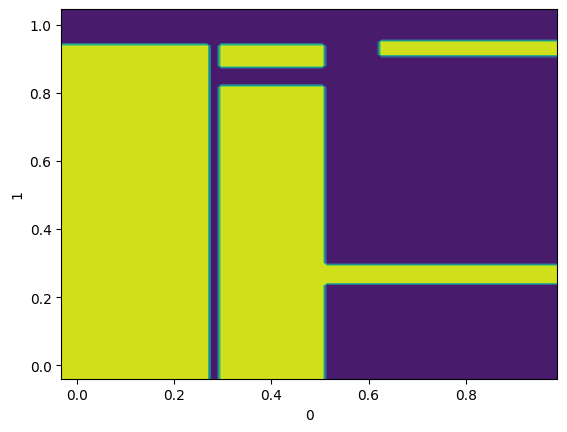

In [4]:
draw_decision_area(clf,X,0,1)
print(clf.score(X,Y))
print(clf.score(X2,Y2))

## Noisy classification

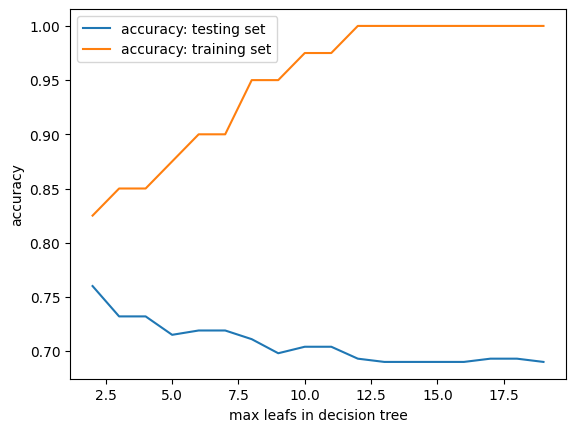

In [5]:
xs,ys,zs = [],[],[]

for leafs in range(2,20):
    clf = DecisionTreeClassifier(max_leaf_nodes=leafs)
    clf.fit(X,Y)

    xs.append(leafs)
    ys.append(clf.score(X2,Y2))
    zs.append(clf.score(X,Y))
    
plt.plot(xs,ys);
plt.plot(xs,zs);
plt.legend(["accuracy: testing set","accuracy: training set"])
plt.xlabel("max leafs in decision tree")
plt.ylabel("accuracy");

## High–dimensional example

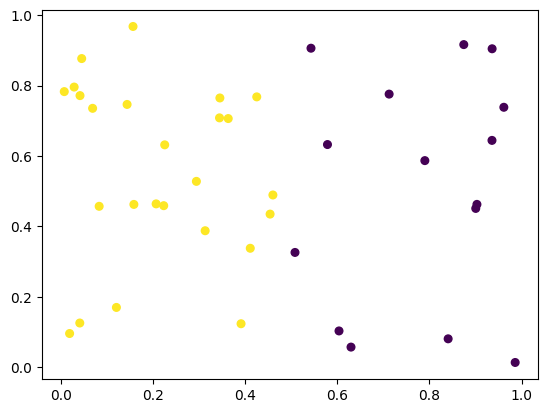

In [10]:
DIMENSIONS = 50
 
SAMPLES = 40
X = np.random.uniform(size=(SAMPLES,DIMENSIONS))
Y = [f1(x) for x in X]
plt.scatter(X[:,0],X[:,1],30,c = Y);

TEST_SAMPLES = 1000
X2 = np.random.uniform(size=(TEST_SAMPLES,DIMENSIONS))
Y2 = [f2(x) for x in X2]

In [11]:
dimension = 50
clf=DecisionTreeClassifier(max_leaf_nodes=2)
clf.fit(X[:,:dimension],Y)
print(tree.export_text(clf))
print(clf.score(X[:,:dimension],Y))
print(clf.score(X2[:,:dimension],Y2))

|--- feature_0 <= 0.48
|   |--- class: True
|--- feature_0 >  0.48
|   |--- class: False

1.0
0.729


## High–dimensional example

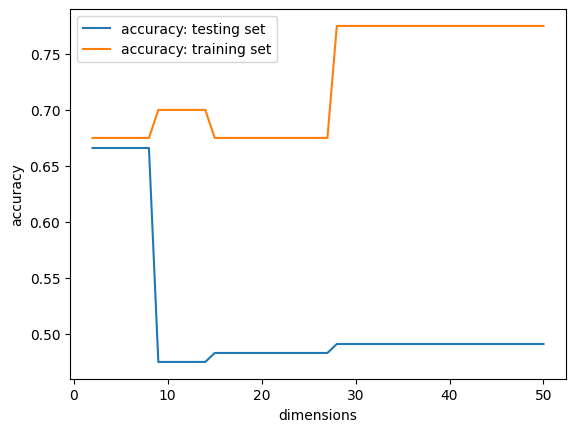

In [20]:
xs,ys,zs = [],[],[]

LEAFS = 2
for d in range(2,DIMENSIONS+1):
    clf = DecisionTreeClassifier(
        max_leaf_nodes=LEAFS)
    clf.fit(X[:,:d],Y)
    
    xs.append(d)
    ys.append(clf.score(X2[:,:d],Y2))
    zs.append(clf.score(X[:,:d],Y))

plt.plot(xs,ys)
plt.plot(xs,zs)
plt.legend(["accuracy: testing set","accuracy: training set"])
plt.xlabel("dimensions")
plt.ylabel("accuracy");

## A more complicated function

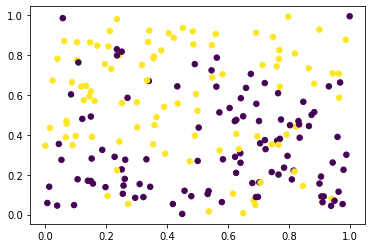

In [32]:
DIMENSIONS = 2

def f(x):
    if x[0] < 0.5:
        return x[1] > 0.3 
    else:
        return x[1] > 0.7

g = lambda x : noise(f(x))
    
SAMPLES = 200
X = np.random.uniform(size=(SAMPLES,DIMENSIONS))
Y = [g(x) for x in X]
plt.scatter(X[:,0],X[:,1],30,c = Y)

TEST_SAMPLES = 1000
X2 = np.random.uniform(size=(TEST_SAMPLES,DIMENSIONS))
Y2 = [g(x) for x in X2]

In [33]:
clf = DecisionTreeClassifier(max_leaf_nodes=20)
clf.fit(X,Y)
#print(tree.export_text(clf))
print(clf.score(X2,Y2))

0.688


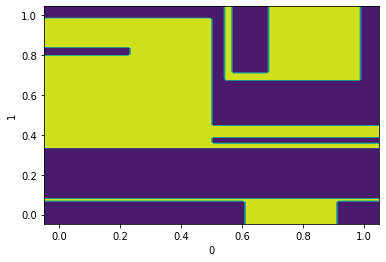

In [34]:
draw_decision_area(clf,X,0,1)

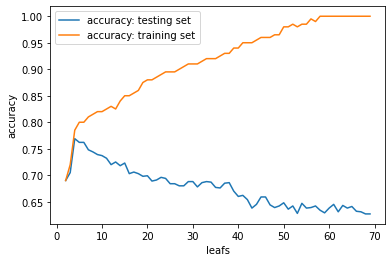

In [35]:
xs,ys,zs = [],[],[]

for leafs in range(2,70):
    clf = DecisionTreeClassifier(max_leaf_nodes=leafs)
    clf.fit(X,Y)

    xs.append(leafs)
    ys.append(clf.score(X2,Y2))
    zs.append(clf.score(X,Y))
    
plt.plot(xs,ys);
plt.plot(xs,zs);
plt.legend(["accuracy: testing set","accuracy: training set"])
plt.xlabel("leafs")
plt.ylabel("accuracy");

## Another example

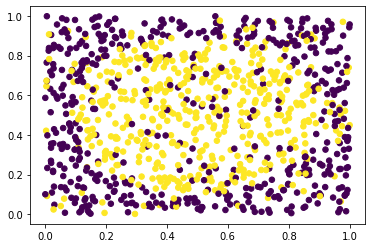

In [36]:
DIMENSIONS = 2

f = lambda x : (x[0]-0.5)**2 + (x[1]-0.5)**2 < 0.16

g = lambda x : noise(f(x),.15)
    
SAMPLES = 1000
X = np.random.uniform(size=(SAMPLES,DIMENSIONS))
Y = [g(x) for x in X]
plt.scatter(X[:,0],X[:,1],30,c = Y)

TEST_SAMPLES = 10000
X2 = np.random.uniform(size=(TEST_SAMPLES,DIMENSIONS))
Y2 = [g(x) for x in X2]

In [37]:
clf = DecisionTreeClassifier(max_leaf_nodes=64)
clf.fit(X,Y)
#print(tree.export_text(clf))
print(clf.score(X2,Y2))

0.7807


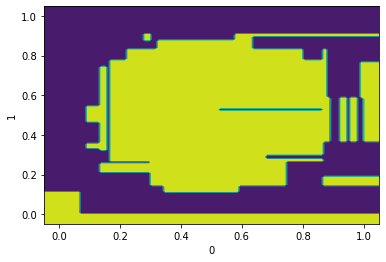

In [38]:
draw_decision_area(clf,X,0,1)

## Another example

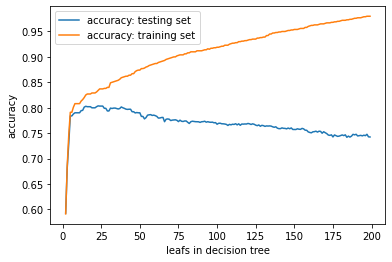

In [42]:
xs,ys,zs = [],[],[]

for leafs in range(2,200):
    clf = DecisionTreeClassifier(max_leaf_nodes=leafs)
    clf.fit(X,Y)

    xs.append(leafs)
    ys.append(clf.score(X2,Y2))
    zs.append(clf.score(X,Y))
    
plt.plot(xs,ys)
plt.plot(xs,zs)
plt.legend(["accuracy: testing set","accuracy: training set"])
plt.xlabel("leafs in decision tree")
plt.ylabel("accuracy");

## Underfitting

* Model not expressive enough to capture the problem
* Or a solution found does not match the problem

Possible solutions:
* Try harder to find a better solution
* Add more parameters
* Try a different model that captures the solution

## Overfitting

* Predictions adjusted too well to training data
* Error on test data $\ggg$ error on training data

**Possible solutions:**
* Don't optimize the model on the training data too much
* Remove features that are too noisy
* Add more training data
* Reduce model complexity

## Bias and variance

$$\mbox{Total learning error} = \mbox{Bias} + \mbox{Variance} + \mbox{noise}$$

**Bias:** error due to model unable to match the complexity of the problem

**Variance:** how much the prediction will vary in response to data points

**Overfitting:** high variance, low bias

**Underfitting:** high bias, low variance

**Important in practice:**

* detecting the source of problems: variance vs. bias, overfitting vs. underfitting

* navigating the trade-off and finding the sweet spot  